# Evaluation

- Tables, graphs, and charts must support your evaluation.
It MUST run in Google Collab. You will also save the Google Collab notebook as a .ipynb notebook and upload that to Canvas. (5 Points)

- What code is yours and what have you adapted? (10 Points)

- You must explain what code you wrote and what you have done that is different. Failure to cite ANY code will result in a zero for this section.

- Did I explain my code clearly? (15 Points) Your code review score will be scaled to a range of 0 to 10 and be used for this score.

- Did explain my licensing clearly? (5 Points) Failure to cite a clear license will result in a zero for this section.

- Did I explain my evaluation clearly? (15 Points)
Just saying "accuracy" is not a clear explanation of an evaluation scheme. Clearly explain the evaluation scheme. Do the metrics make sense? You MUST explain how you are preventing overfitting.

# Abstract

In this research, we looked at the 'Google Play Store Apps' data and used various statistical methods and visualization tools to sort and analyze it. The goal was to predict the "Rating" of apps, which can be anywhere from 1 to 19, using a linear regression model. We checked the quality of the data and figured out which features were most significant in determining the Rating. To do this, we used tools like p-value, t-statistics, histograms, Q-Q plots, heat maps, and box plots to find answers to our questions and have a better understanding of the data. We also used the Seaborn library to make our data analysis and visualization better.







<br>•	Which independent variables are useful to predict a target (dependent variable)?
<br>•	Which independent variables have missing data? How much
<br>•	Do the training and test sets have the same data?
<br>•	In the predictor variables independent of all the other predictor variables?
<br>•	Which predictor variables are the most important?
<br>•	Do the ranges of the predictor variables make sense?
<br>•	What are the distributions of the predictor variables?


## Data Set
The dataset utilized in this study consists of a single csv file, designated as "googleplaystore.csv," which encompasses a range of 0 to 10841 instances and 13 attributes. The data pertains to the characteristics of various applications available on the Google Play Store, including columns such as "App," "Category," "Rating," "Reviews," "Size," "Installs," "Type," "Price," "Content Rating," "Genres," "Last Updated," "Current Ver," and "Android Ver." The utilization of linear regression models for predicting the "Rating" (which is on a scale of 1 to 19) based on the most influential columns is deemed appropriate given the nature of the data. The results of the analysis suggest that the dataset is well-suited for investigating the interdependence between the attributes of the Google Play Store Apps and its Rating.

The data pertains to the specifications of various applications available on the Google Play Store. By just observing the data it provides us the following information:

    1.The name of the application as recorded in the "App" column
    2.The category to which the application belongs, as stated in the "Category" column.
    3.The average rating of the application as determined by customer feedback, as reflected in the "Rating" column.
    4.The number of customers who have provided reviews for the application, recorded in the "Reviews" column.
    5.The size of the application in megabytes, as indicated in the "Size" column.
    6.The number of customers who have installed the app, documented in the "Installs" column.
    7.The type of application, either free or paid, as specified in the "Type" column.
    8.If the application is paid, its price is listed in dollars in the "Price" column.
    9.The target demographic for the application, whether it is meant for general audiences, children, or mature audiences, as stated in the "Age Group" column.
    10.The specific genre to which the application belongs, a subcategory of the main category listed in the "Category" column, as recorded in the "Genres" column.                                                                                                                                                                  

In [1]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.7/177.7 MB 7.4 MB/s eta 0:00:00


In [2]:
# Importing all the libararies required for the assignment
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

sns.set(rc={"figure.figsize": (16, 8)})

In [3]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [4]:
# calculate the minimum amount of memory in gigabytes that a process should have access to based on a percentage of available virtual memory.

pct_memory = 0.5 # the process should have access to 50% of the available memory.
virtual_memory = psutil.virtual_memory() #the psutil library is used to retrieve information about the system's virtual memory. psutil.virtual_memory() returns a named tuple with information about total, available, and used memory.
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0)) #1073741824 bytes in a gigabyte.
print(min_mem_size)

6


In [5]:
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:15804..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.17" 2022-10-18; OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04); OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpedklh9ut
  JVM stdout: /tmp/tmpedklh9ut/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpedklh9ut/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:15804
Connecting to H2O server at http://127.0.0.1:15804 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_po6af5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,6 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Exploratory Data Analysis (EDA)

In [6]:
googleplaystore = pd.read_csv(
    "https://raw.githubusercontent.com/jurreyyahfirdaws-mohammad/INFO6105/main/googleplaystore.csv"
)  # Reading CSV file into Pandas DataFrame and naming as googleplaystore

In [7]:
googleplaystore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
print("Total Rows before dropping the duplicates of the same app:",googleplaystore.shape)

googleplaystore.drop_duplicates(inplace=True)

print("Total Rows after dropping the duplucates of the same app:",googleplaystore.shape)

Total Rows before dropping the duplicates of the same app: (10841, 13)
Total Rows after dropping the duplucates of the same app: (10358, 13)


In [10]:
googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [11]:
googleplaystore = googleplaystore.drop(columns=["Last Updated","Current Ver","Android Ver"],axis=1)

In [12]:
googleplaystore.rename(columns={'Content Rating': 'Content_Rating'}, inplace=True)

In [13]:
googleplaystore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [14]:
print(googleplaystore.App.value_counts(), 
      googleplaystore.Category.value_counts(),
      googleplaystore.Reviews.value_counts(),
      googleplaystore.Size.value_counts(),
      googleplaystore.Installs.value_counts(), 
      googleplaystore.Type.value_counts(),
      googleplaystore.Price.value_counts(),
      googleplaystore.Content_Rating.value_counts(),
      googleplaystore.Genres.value_counts(),
      sep="\n \n")


ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Theme Android P Black design for LG V30          1
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9660, dtype: int64
 
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AN

##Data Cleaning

In [15]:

#--------------------------------------------------------Installs Column Cleaning and Setting----------------------------------------------------------------------------#


#for the installs column , it consists of '+', ',', ' ' string types after the numerical value, hence those string types are removed and installs column type is changed from object to int

googleplaystore['Installs'] = googleplaystore['Installs'].str.replace(',', '')
googleplaystore['Installs'] = googleplaystore['Installs'].str.replace('+', '')

# the Free string is replaced with numberical 0
googleplaystore['Installs'] = googleplaystore['Installs'].replace('Free', '0')

#converting to int type from string type
googleplaystore['Installs'] = googleplaystore['Installs'].astype(str).astype(int)



#--------------------------------------------------------Reviews Column Cleaning and Setting----------------------------------------------------------------------------#


# for the reviews column, there is only one type of string that is 3M which means 3 million, hence the value is changed to 3000000 and the object type is converted to int type

googleplaystore[googleplaystore['Reviews'].str.isnumeric() == False]
googleplaystore['Reviews']  = googleplaystore['Reviews'].str.replace('3.0M', '3000000')
googleplaystore['Reviews'] = googleplaystore['Reviews'].astype(str).astype(int)



#--------------------------------------------------------Type Column Cleaning and Setting-----------------------------------------------------------------------------#

# for the Type column, the 0 string is replaced with string Free
googleplaystore['Type'] = googleplaystore['Type'].replace('0', 'Free')



#--------------------------------------------------------Price Column Cleaning and Setting-----------------------------------------------------------------------------#

# the first line performs two operations at once: replacing "$" with an empty string and replacing "Everyone" with "0". The astype method is then used to cast the "Price" column to the float type.

# The second line uses the apply method to apply a lambda function that checks the value of each element in the "Price" column. If it's not equal to 0, the value remains unchanged. If it's equal to 0, it is set to 0.

googleplaystore['Price'] = googleplaystore['Price'].str.replace('$', '').str.replace('Everyone', '0').astype(float)
googleplaystore.Price = googleplaystore.Price.apply(lambda x: x if x != 0 else 0)
googleplaystore.Price.head()




#--------------------------------------------------------Category Column Cleaning and Setting-----------------------------------------------------------------------------#
# Inside the column
# Everyone           8382
# Teen               1146
# Mature 17+          447
# Everyone 10+        377
# Adults only 18+       3
# Unrated               2
# Name: Content_Rating, dtype: int64

# from sklearn.preprocessing import LabelEncoder
# obj = LabelEncoder()
# data['Category'] = obj.fit_transform(data['Category'].astype('object'))



googleplaystore['Content_Rating'] = googleplaystore['Content_Rating'].str.replace('Teen', 'Age_13+').str.replace('Mature 17+', 'Age_17+').str.replace('Everyone 10+', 'Age_10+')
googleplaystore['Content_Rating'] = googleplaystore['Content_Rating'].str.replace('Adults only 18+', 'Age_18+').str.replace('Unrated', 'Age_0+').str.replace('Everyone', 'Age_0+')


googleplaystore.dtypes





<ipython-input-15-6c6a63a6b37a>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  googleplaystore['Installs'] = googleplaystore['Installs'].str.replace('+', '')
<ipython-input-15-6c6a63a6b37a>:23: FutureWarning: The default value of regex will change from True to False in a future version.
  googleplaystore['Reviews']  = googleplaystore['Reviews'].str.replace('3.0M', '3000000')
<ipython-input-15-6c6a63a6b37a>:41: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  googleplaystore['Price'] = googleplaystore['Price'].str.replace('$', '').str.replace('Everyone', '0').astype(float)
<ipython-input-15-6c6a63a6b37a>:64: FutureWarning: The default value of regex will change from True to Fal

App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price             float64
Content_Rating     object
Genres             object
dtype: object

In [16]:
googleplaystore.shape  # Shape of the dataframe - Here, we have 1143 samples of data with 12 predictors and 1 result

(10358, 10)

In [17]:
googleplaystore.head()  # Sample of how our data looks

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Age_0+,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Age_0+,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Age_0+,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Age_13+,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Age_0+,Art & Design;Creativity


In [18]:
columns = list(googleplaystore.columns)
print(columns)  # Name of all predictors and result

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Genres']


In [19]:
googleplaystore.describe()  # Statistical description of our dataset

,Rating,Reviews,Installs,Price
count,8893.000000,1.035800e+04,1.035800e+04,10358.000000
mean,4.189542,4.061551e+05,1.415639e+07,1.030701
std,0.545452,2.696768e+06,8.023580e+07,16.277843
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.200000e+01,1.000000e+03,0.000000
50%,4.300000,1.683000e+03,1.000000e+05,0.000000
75%,4.500000,4.648275e+04,1.000000e+06,0.000000
max,19.000000,7.815831e+07,1.000000e+09,400.000000


## Is there any multicollinearity in the model?

<AxesSubplot:>

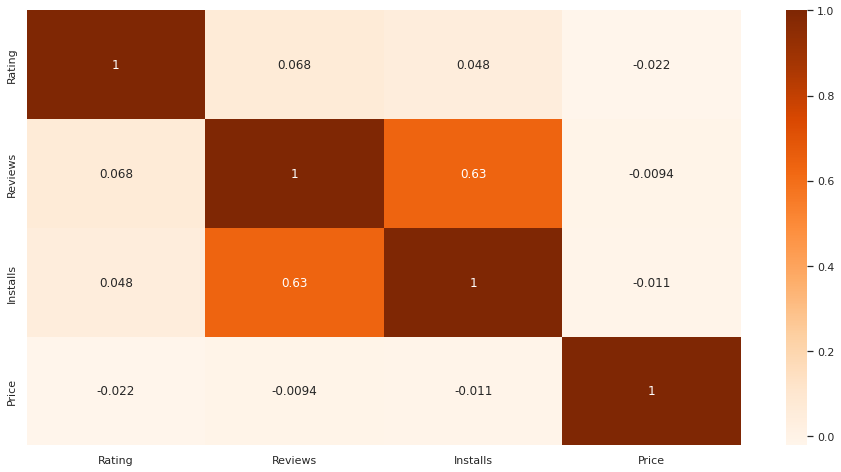

In [20]:
sns.heatmap(
    googleplaystore.corr(), annot=True, cmap="Oranges"
)  # Heatmap showing correlation between the attributes.

# Correlation Analysis

- According to the corelation HeatMap, reviews and installs are significantly correlated 

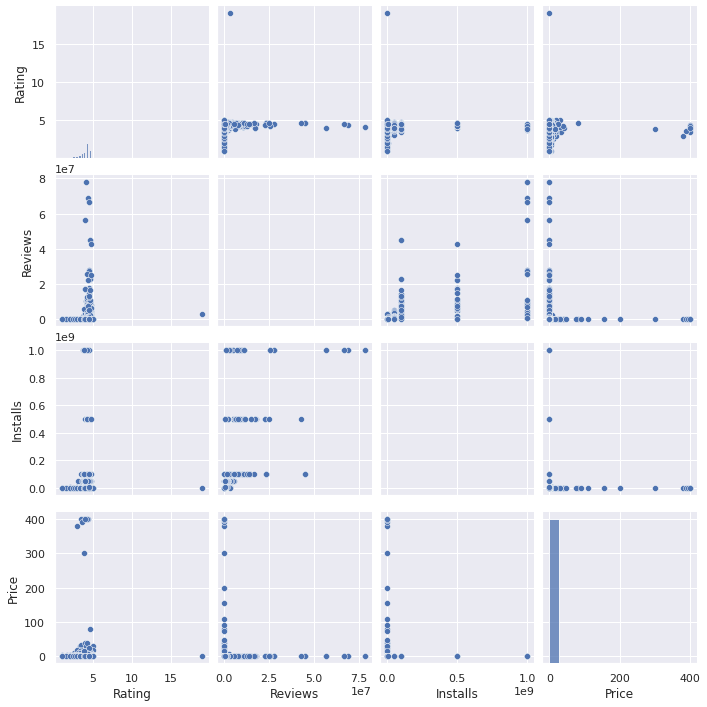

In [21]:
sns.pairplot(
    googleplaystore
)  # All attributes are plotted against each other to see the pattern of distribution

array([[<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'Reviews'}>],
       [<AxesSubplot:title={'center':'Installs'}>,
        <AxesSubplot:title={'center':'Price'}>]], dtype=object)

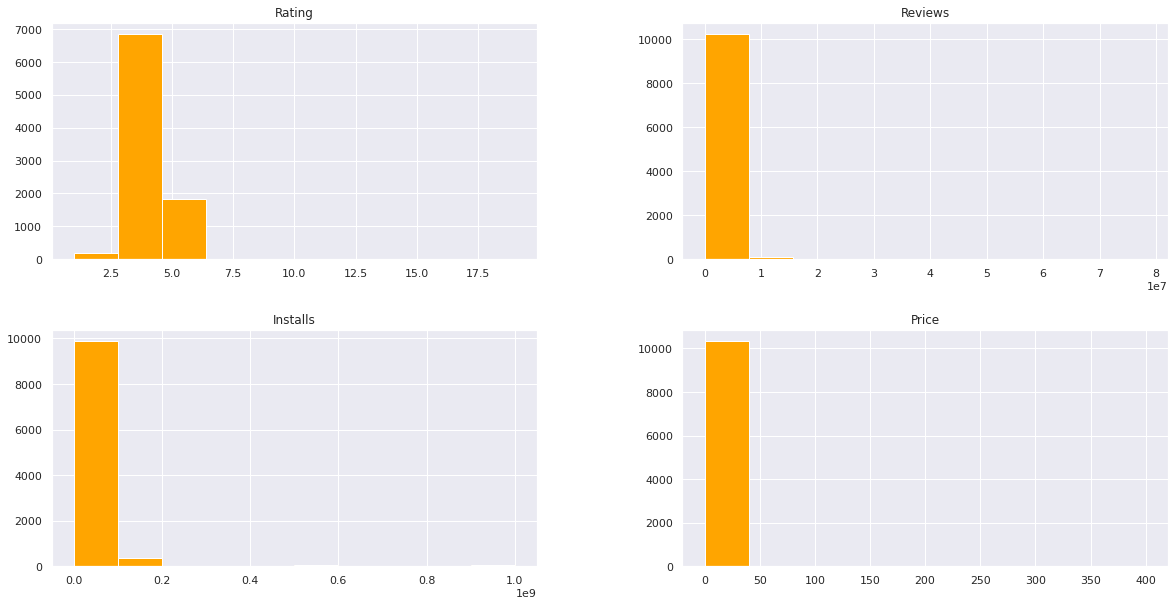

In [22]:
googleplaystore.hist(color="orange", figsize=(20, 10))  # Plotted Histogram

In [23]:
df = h2o.H2OFrame(
    googleplaystore
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [24]:
df.types  # Datatype of all attributes

{'App': 'enum',
 'Category': 'enum',
 'Rating': 'real',
 'Reviews': 'int',
 'Size': 'enum',
 'Installs': 'int',
 'Type': 'enum',
 'Price': 'real',
 'Content_Rating': 'enum',
 'Genres': 'enum'}

In [25]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [26]:
print(df_train.shape)
print(df_test.shape)

(8320, 10)
(2038, 10)


In [27]:
df_train.head()

App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Age_0+,Art & Design
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Age_0+,Art & Design;Pretend Play
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,5e+06,Free,0,Age_0+,Art & Design
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Age_0+,Art & Design;Creativity
Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Age_0+,Art & Design
Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000,Free,0,Age_0+,Art & Design
Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1e+06,Free,0,Age_0+,Art & Design
Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1e+06,Free,0,Age_0+,Art & Design
Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000,Free,0,Age_0+,Art & Design;Creativity
Name Art Photo Editor - Focus n Filters,ART_AND_DESIGN,4.4,8788,12M,1e+06,Free,0,Age_0+,Art & Design


In [28]:
X = df.columns
print(X)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Genres']


In [29]:
# Set target and predictor variables
y = "Reviews"
X.remove(y)  # Removing the result frm our predictors data
X.remove("App")
X.remove("Genres")
X.remove("Size")  # Removing App,Genres,Size from the predictor's data, as it is not related
print(X)

['Category', 'Rating', 'Installs', 'Type', 'Price', 'Content_Rating']


In [30]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [31]:
aml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20230301_25045_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    85                 85                          21314                  4            4            4             11            16            13.4

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 931307826418.8336
RMSE: 965042.9142887034
MAE: 164217.51857707684
RMSLE: NaN
Mean Residual Deviance: 931307826418.8336

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 2166804169625.801
RMSE: 1472006.851079777
MAE: 217024.22994627402
RMSLE: NaN
Mean Residual Deviance: 2166804169625.801

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     216591       41825.8      187152        187834        190171        236251        281548
mean_residual_deviance  2.18389e+12  1.78721e+12  1.48102e+12   1.91741e+12   7.20872e+11   1.51425e+12   5.28592e+12
mse                     2.18389e+12  1.78721e+12  1.48102e+12   1.91741e+12   7.20872e+11   1.51425e+12   5.28592e+12
r2                      0.674673     0.0825531    0.672801      0.537358      0.738067      0.740048      0.685092
residual_deviance       2.18389e+12  1.78721e+12  1.48102e+12   1.91741e+12   7.20872e+11   1.51425e+12   5.28592e+12
rmse                    1.39608e+06  541832       1.21697e+06   1.3847e+06    849042        1.23055e+06   2.29911e+06
rmsle                   nan          0            nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-03-01 02:53:14  4.755 sec   0                  2.61001e+06      642127          6.81213e+12
    2023-03-01 02:53:14  4.786 sec   5                  1.98296e+06      428637          3.93214e+12
    2023-03-01 02:53:14  4.814 sec   10                 1.62989e+06      329351          2.65653e+12
    2023-03-01 02:53:14  4.837 sec   15                 1.4321e+06       267244          2.05092e+12
    2023-03-01 02:53:14  4.860 sec   20                 1.30254e+06      231218          1.69661e+12
    2023-03-01 02:53:14  4.881 sec   25                 1.2268e+06       211594          1.50504e+12
    2023-03-01 02:53:14  4.900 sec   30                 1.17614e+06      197073          1.38332e+12
    2023-03-01 02:53:14  4.922 sec   35                 1.13549e+06      188437          1.28934e+12
    2023-03-01 02:53:14  4.944 sec   40                 1.10682e+06      184327          1.22506e+12
    2023-03-01 02:53:14  4.965 sec   45                 1.07681e+06      181562          1.15952e+12
    2023-03-01 02:53:14  4.984 sec   50                 1.05007e+06      178569          1.10264e+12
    2023-03-01 02:53:14  5.003 sec   55                 1.04036e+06      178409          1.08235e+12
    2023-03-01 02:53:14  5.027 sec   60                 1.0209e+06       174760          1.04223e+12
    2023-03-01 02:53:14  5.046 sec   65                 1.01201e+06      171658          1.02416e+12
    2023-03-01 02:53:14  5.065 sec   70                 996062           169934          9.92139e+11
    2023-03-01 02:53:14  5.085 sec   75                 984838           167504          9.69906e+11
    2023-03-01 02:53:14  5.105 sec   80                 974023           1

In [32]:
print(
    aml.leaderboard
)  # Leaderboard showing the performance of different models on the dataset.

model_id                                                       rmse          mse     mae    rmsle    mean_residual_deviance
GBM_grid_1_AutoML_1_20230301_25045_model_2              1.47201e+06  2.1668e+12   217024      nan               2.1668e+12
StackedEnsemble_BestOfFamily_4_AutoML_1_20230301_25045  1.50211e+06  2.25633e+12  224002      nan               2.25633e+12
StackedEnsemble_AllModels_2_AutoML_1_20230301_25045     1.50245e+06  2.25736e+12  256972      nan               2.25736e+12
GBM_5_AutoML_1_20230301_25045                           1.5079e+06   2.27375e+12  232391      nan               2.27375e+12
StackedEnsemble_AllModels_3_AutoML_1_20230301_25045     1.51303e+06  2.28925e+12  231905      nan               2.28925e+12
StackedEnsemble_BestOfFamily_3_AutoML_1_20230301_25045  1.51775e+06  2.30358e+12  246875      nan               2.30358e+12
XGBoost_grid_1_AutoML_1_20230301_25045_model_4          1.54817e+06  2.39683e+12  235292      nan               2.39683e+12
GBM_2_Aut

The models listed in the leaderboard are ranked based on their rmse score, where a lower score indicates better performance. The top row in the leaderboard represents the best-performing model with the lowest rmse score. The evaluation metrics can be used to compare the performance of different models and help in selecting the best model for the particular use case.

In this leaderboard, the top 3 best performing models are

1. StackedEnsemble_BestOfFamily_4_AutoML_1_20230216_165301 its rmse is 1.58922e+06  
2. XGBoost_grid_1_AutoML_1_20230216_165301_model_4  its rmse is 1.59273e+06  
3. GBM_2_AutoML_1_20230216_165301  its rmse is  1.59524e+06 

In [33]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'GBM_grid_1_AutoML_1_20230301_25045_model_2': 0,
 'GLM_1_AutoML_1_20230301_25045': 40}

In [34]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

0


In [35]:
best_model.algo

'gbm'

In [36]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

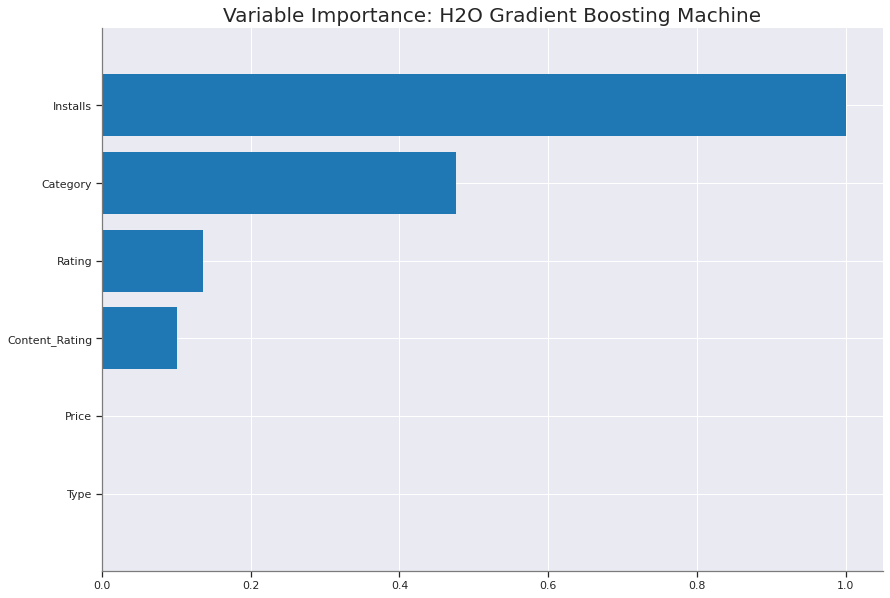

<Figure size 432x288 with 0 Axes>

In [37]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-38-0cab54a0793b>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


40
glm


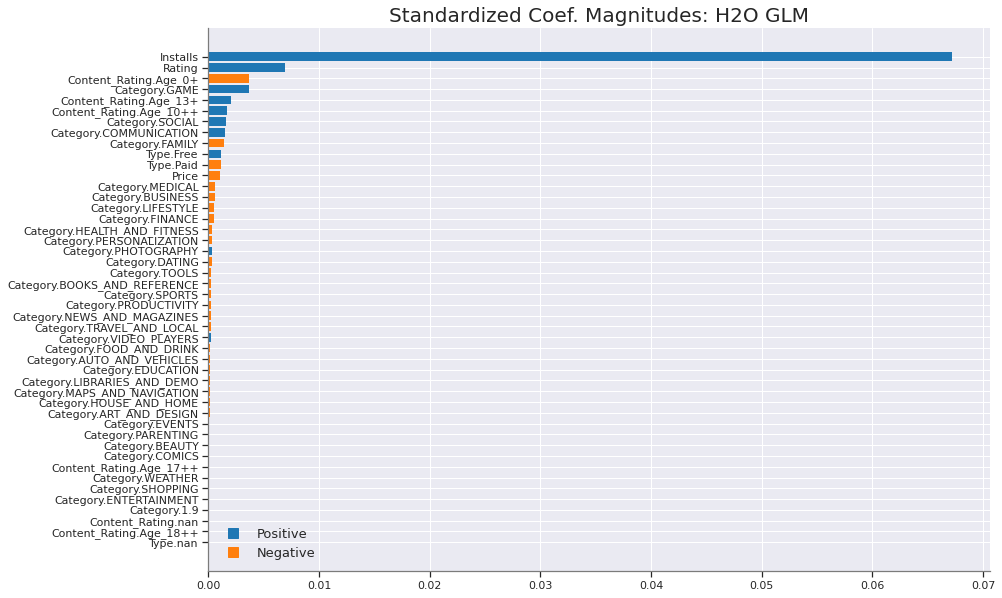

In [38]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

In [39]:
print(best_model.rmse(train=True))

965042.9142887034


In [40]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [41]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 5950989464146.87,
 'rmse': 2439464.995474801,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [42]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [43]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

           predict
0     1.454843e+06
1     2.171132e+03
2    -9.232147e+03
3     4.944543e+04
4     1.313843e+03
...            ...
2033  1.714403e+03
2034  1.397275e+04
2035  1.097210e+05
2036  1.083749e+04
2037 -5.193714e+03

[2038 rows x 1 columns]


In [44]:
y_test = h2o.as_list(df_test[y])  # Real Answers
y_test

,Reviews
0,215644
1,13880
2,3632
3,194216
4,654
...,...
2033,20
2034,22
2035,88486
2036,117


In [45]:
print(X)

['Category', 'Rating', 'Installs', 'Type', 'Price', 'Content_Rating']


In this Section, we will be using the GLM model to check if regularization is helping us to improve the accuracy and reduce overfitting. 

In [46]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

googleplaystore_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5, remove_collinear_columns = True
)  # Elastic Net Regularization
googleplaystore_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5, remove_collinear_columns = True
)  # RIDGE Regularization
googleplaystore_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5, remove_collinear_columns = True
)  # LASSO Regularization
googleplaystore_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True, remove_collinear_columns = True
)  # Lambda Search

In [47]:
googleplaystore_glm.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,None,43,42,1,py_2_sid_bd9a
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,436394.03,28714.143,421888.97,473134.1,446230.2,444094.0,396622.94
mean_residual_deviance,4265952150000.0000000,1544566730000.0000000,4851922600000.0000000,4264399990000.0000000,4103570460000.0000000,6186126000000.0000000,1923742300000.0000000
mse,4265952150000.0000000,1544566730000.0000000,4851922600000.0000000,4264399990000.0000000,4103570460000.0000000,6186126000000.0000000,1923742300000.0000000
null_deviance,11335908000000000.0000000,4915834300000000.0000000,13992528900000000.0000000,6495830400000000.0000000,13913773100000000.0000000,16590976600000000.0000000,5686431500000000.0000000
r2,0.3351774,0.2215128,0.4164163,-0.0530116,0.5041748,0.3828748,0.4254326
residual_deviance,7081322500000000.0000000,2539690670000000.0000000,8165785100000000.0000000,6840097800000000.0000000,6898101900000000.0000000,10238038100000000.0000000,3264590680000000.0000000
rmse,2033532.0,404196.16,2202708.0,2065042.4,2025727.1,2487192.2,1386990.4
rmsle,nan,0.0,nan,nan,nan,nan,nan


# Ridge Regularization

In [48]:
googleplaystore_glm_regularization_ridge.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Ridge ( lambda = 1627.1 ),46,42,1,py_2_sid_bd9a
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,438677.3,36528.09,408548.72,497642.44,423767.12,413919.47,449508.84
mean_residual_deviance,4160192510000.0000000,521414836000.0000000,3585263530000.0000000,4744812700000.0000000,3689789520000.0000000,4600027400000.0000000,4181068870000.0000000
mse,4160192510000.0000000,521414836000.0000000,3585263530000.0000000,4744812700000.0000000,3689789520000.0000000,4600027400000.0000000,4181068870000.0000000
null_deviance,11337274800000000.0000000,1142085490000000.0000000,12494185500000000.0000000,10422876300000000.0000000,11039768900000000.0000000,10149688500000000.0000000,12579852900000000.0000000
r2,0.3795632,0.1304372,0.5428322,0.2492935,0.4277689,0.2419876,0.4359337
residual_deviance,6925116100000000.0000000,901669060000000.0000000,5711325100000000.0000000,7824196100000000.0000000,6316919800000000.0000000,7682046200000000.0000000,7091093000000000.0000000
rmse,2036430.9,128168.0,1893479.2,2178259.2,1920882.5,2144767.5,2044766.2
rmsle,nan,0.0,nan,nan,nan,nan,nan


# Lasso Regularization

In [49]:
googleplaystore_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Lasso (lambda = 1627.1 ),46,27,1,py_2_sid_bd9a
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,435017.06,33192.44,458867.2,475131.22,418302.5,431804.62,390979.78
mean_residual_deviance,4149014950000.0000000,1565713370000.0000000,6419980000000.0000000,4813153600000.0000000,3674616630000.0000000,3609632700000.0000000,2227691590000.0000000
mse,4149014950000.0000000,1565713370000.0000000,6419980000000.0000000,4813153600000.0000000,3674616630000.0000000,3609632700000.0000000,2227691590000.0000000
null_deviance,11337647400000000.0000000,4721196600000000.0000000,18027536800000000.0000000,11979067500000000.0000000,11512662000000000.0000000,10394261100000000.0000000,4774711400000000.0000000
r2,0.3694719,0.1005417,0.4136889,0.3060337,0.4761404,0.4238638,0.2276327
residual_deviance,6913407500000000.0000000,2620587450000000.0000000,10567287100000000.0000000,8312316500000000.0000000,6030045500000000.0000000,5988380600000000.0000000,3669008020000000.0000000
rmse,2007407.1,386218.1,2533768.0,2193890.0,1916928.9,1899903.4,1492545.4
rmsle,nan,0.0,nan,nan,nan,nan,nan


## Does regularization help?

Upon applying the ridge regularization, a marginal enhancement in the evaluation metrics of the cross-validation data is noticeable (r2 mean increased from 0.4003762 to 0.4227884). This implies that ridge regularization aids in preventing the overfitting of the model and results in a better performance of metrics on the validation dataset.

In [50]:
lambda_search = googleplaystore_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)

glm Model Build progress: |

/usr/local/lib/python3.8/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: remove_collinear_columns should only be used with no regularization, i.e. lambda=0.0.  It is used improperly here with lambda_search.  Please disable lambda_search and set lambda=0.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


In [51]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1677638948810_27


GLM Model: summary
    family    link      regularization                                  lambda_search                                                                     number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------------------------------------  --------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 2965200.0 )  nlambda = 100, lambda.max = 3254300.0, lambda.min = 2965200.0, lambda.1se = -1.0  46                            1                              2                       py_2_sid_bd9a

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 4164219773400.789
RMSE: 2040642.000303039
MAE: 357310.29046531953
RMSLE: 6.041877911532954
Mean Residual Deviance: 4164219773400.789
R^2: 0.3887050158444225
Null degrees of freedom: 8319
Residual degrees of freedom: 8318
Null deviance: 5.667690626082385e+16
Residual deviance: 3.4646308514694564e+16
AIC: 265375.9535642924

Scoring History: 
    timestamp            duration    iteration    lambda    predictors    deviance_train    alpha    iterations    training_rmse      training_deviance    training_mae        training_r2
--  -------------------  ----------  -----------  --------  ------------  ----------------  -------  ------------  -----------------  -------------------  ------------------  ------------------
    2023-03-01 02:54:37  0.000 sec   1            3.3e+06   1             6.81213e+12       0.5
    2023-03-01 02:54:37  0.009 sec   2            3e+06     2             4.16422e+12       0.5
    2023-03-01 02:54:37  0.014 sec   3            2.7e+06   2             4.16422e+12       0.5
    2023-03-01 02:54:37  0.021 sec   4            2.5e+06   2             4.16422e+12       0.5
    2023-03-01 02:54:37  0.026 sec   5            2.2e+06   2             4.16422e+12       0.5
    2023-03-01 02:54:37  0.029 sec   6            2e+06     2             4.16422e+12       0.5
    2023-03-01 02:54:37  0.033 sec   7            1.9e+06   2             4.16422e+12       0.5      7             2040642.000303039  4164219773400.789    357310.29046531953  0.3887050158444225

Variable Importances: 
variable                      relative_importance    scaled_importance    percentage
----------------------------  ---------------------  -------------------  ------------
Installs                      1627337.25             1.0                  1.0
Category.1.9                  0.0                    0.0                  0.0
Category.ART_AND_DESIGN       0.0                    0.0                  0.0
Category.AUTO_AND_VEHICLES    0.0                    0.0                  0.0
Category.BEAUTY               0.0                    0.0                  0.0
Category.BOOKS_AND_REFERENCE  0.0                    0.0                  0.0
Category.BUSINESS             0.0                    0.0                  0.0
Category.COMICS               0.0                    0.0                  0.0
Category.COMMUNICATION        0.0                    0.0                  0.0
Category.DATING               0.0                    0.0                  0.0
---                           ---                    ---                  ---
Content_Rating.Age_10++       0.0                    0.0                  0.0
Content_Rating.Age_13+        0.0                    0.0                  0.0
Content_Rating.Age_17++       0.0                    0.0                  0.0
Content_Rating.Age_18++       0.0                    0.0                  0.0
Content_Rating.nan            0.0                    0.0                  0.0
Type.Free                     0.0                    0.0                  0.0


Here we can observe that regularization helps a bit in reducing the overfitting of our GLM model. 

In [52]:
coeff_table = googleplaystore_glm._model_json["output"]["coefficients_table"]

In [53]:
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each attributes.

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-246312.562688,2.201163e+06,-0.111901,9.109045e-01,7.501754e+05
1,Category.ART_AND_DESIGN,-507070.840714,2.147085e+06,-0.236167,8.133089e-01,-5.070708e+05
2,Category.AUTO_AND_VEHICLES,-475401.610869,2.144759e+06,-0.221657,8.245861e-01,-4.754016e+05
3,Category.BEAUTY,-492636.080514,2.151541e+06,-0.228969,8.188987e-01,-4.926361e+05
4,Category.BOOKS_AND_REFERENCE,-597206.310655,2.134858e+06,-0.279741,7.796836e-01,-5.972063e+05
5,Category.BUSINESS,-467851.672747,2.135380e+06,-0.219095,8.265813e-01,-4.678517e+05
6,Category.COMICS,-448418.049167,2.153949e+06,-0.208184,8.350903e-01,-4.484180e+05
7,Category.COMMUNICATION,-278835.551176,2.135603e+06,-0.130565,8.961224e-01,-2.788356e+05
8,Category.DATING,-295844.161898,2.142547e+06,-0.138081,8.901801e-01,-2.958442e+05
9,Category.EDUCATION,-455641.932581,2.137697e+06,-0.213146,8.312182e-01,-4.556419e+05


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
XGBoost_grid_1_AutoML_1_20230301_25045_model_4,1.89357e+06,3.58559e+12,288305,nan,3.58559e+12,2283,0.01807,XGBoost
XGBoost_grid_1_AutoML_1_20230301_25045_model_1,1.92666e+06,3.71202e+12,358876,nan,3.71202e+12,732,0.007314,XGBoost
XGBoost_1_AutoML_1_20230301_25045,1.9502e+06,3.80328e+12,340870,nan,3.80328e+12,1008,0.012567,XGBoost
StackedEnsemble_BestOfFamily_1_AutoML_1_20230301_25045,1.95158e+06,3.80865e+12,342211,nan,3.80865e+12,671,0.031991,StackedEnsemble
XRT_1_AutoML_1_20230301_25045,1.95161e+06,3.80878e+12,295446,5.31339,3.80878e+12,700,0.016697,DRF
DRF_1_AutoML_1_20230301_25045,1.99678e+06,3.98711e+12,291568,4.17567,3.98711e+12,906,0.011108,DRF
GBM_grid_1_AutoML_1_20230301_25045_model_3,2.02793e+06,4.1125e+12,396048,nan,4.1125e+12,360,0.017031,GBM
GBM_grid_1_AutoML_1_20230301_25045_model_9,2.02851e+06,4.11486e+12,363736,nan,4.11486e+12,259,0.008667,GBM
GBM_3_AutoML_1_20230301_25045,2.03299e+06,4.13307e+12,319098,nan,4.13307e+12,897,0.032989,GBM
XGBoost_grid_1_AutoML_1_20230301_25045_model_6,2.0361e+06,4.14571e+12,376096,nan,4.14571e+12,643,0.005878,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

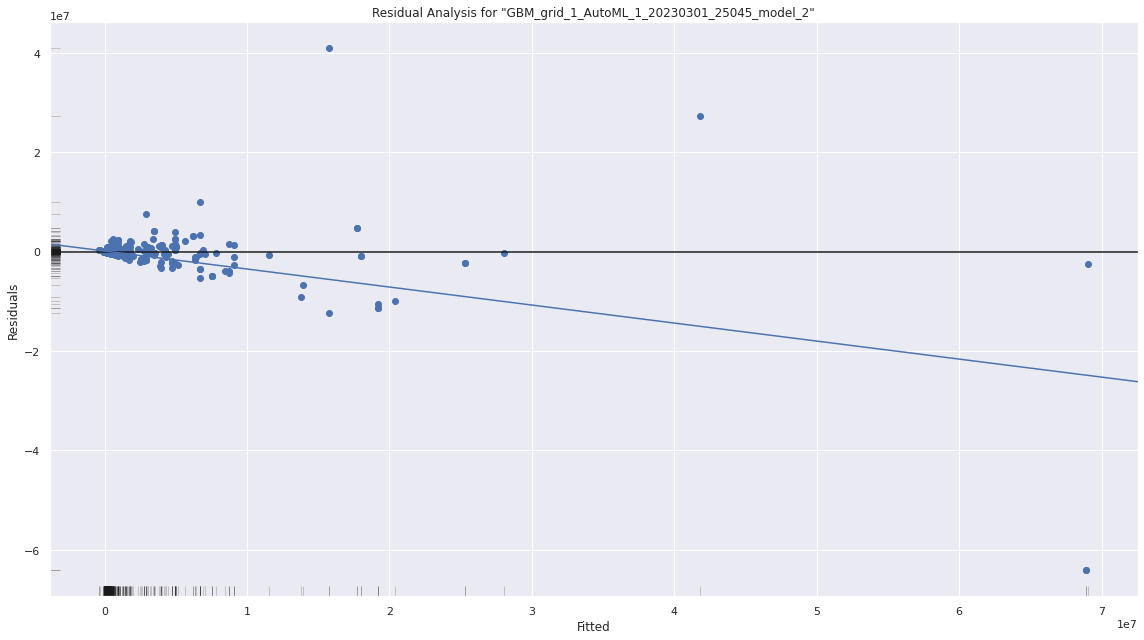

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

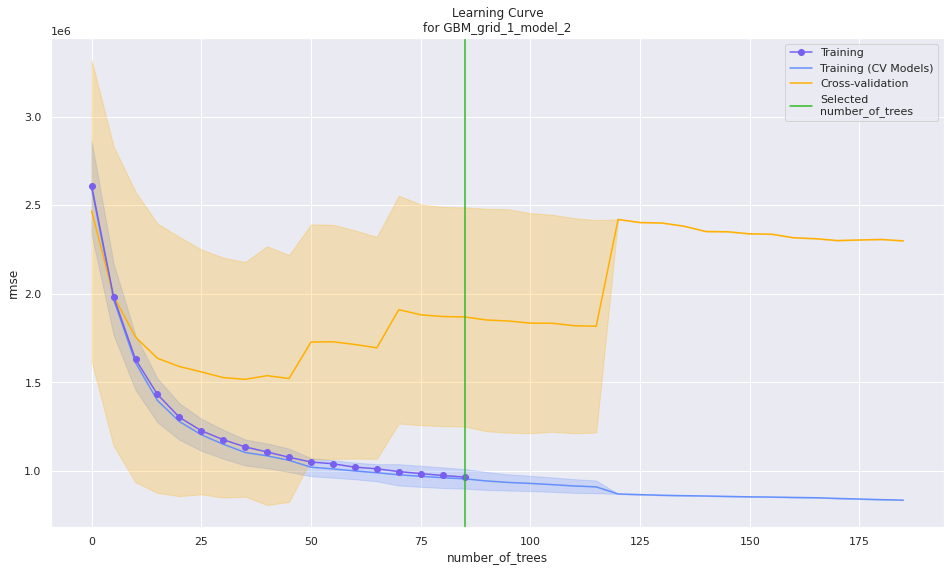

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

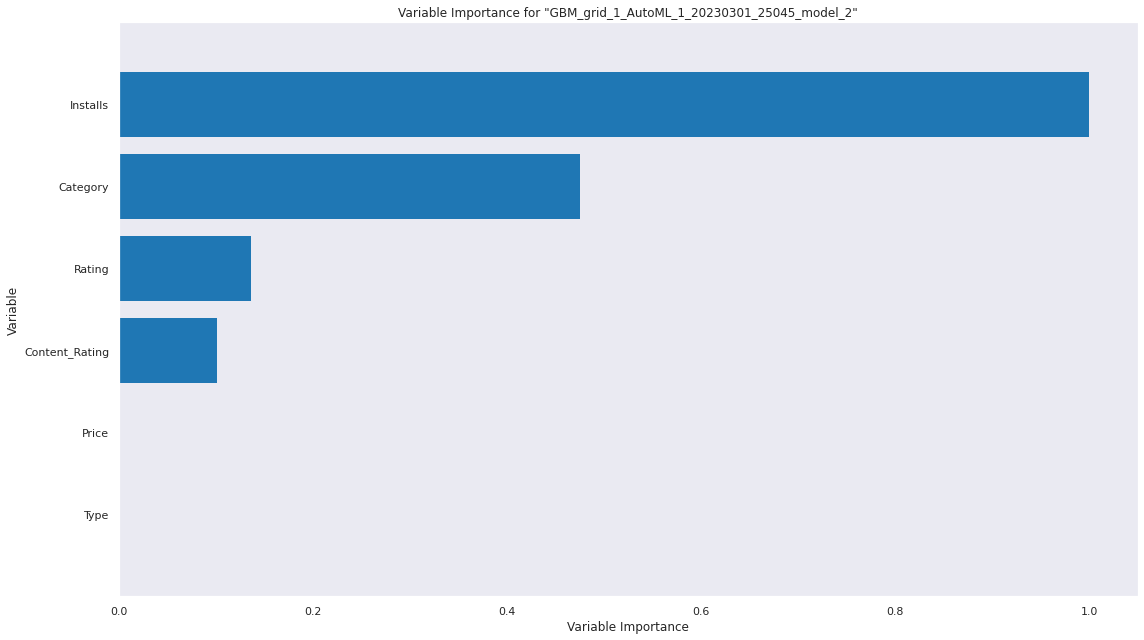

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

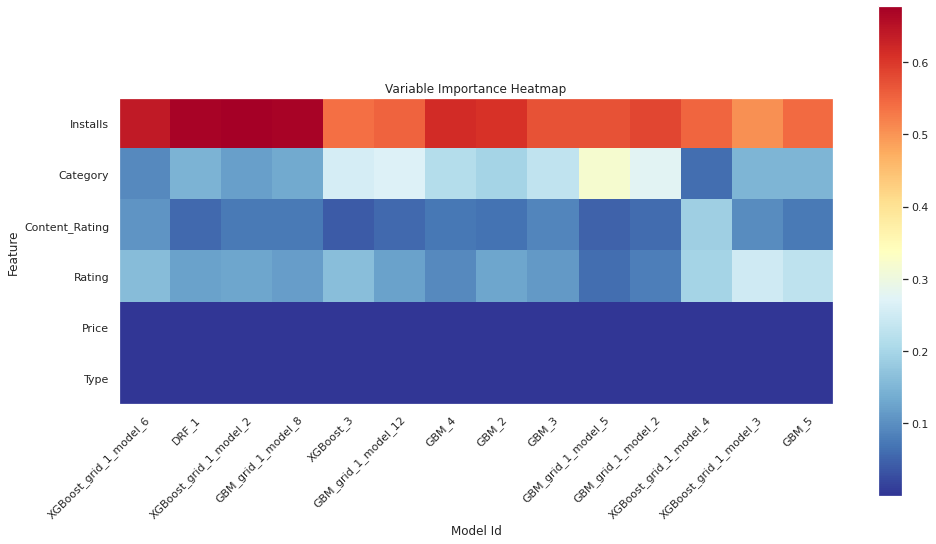

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

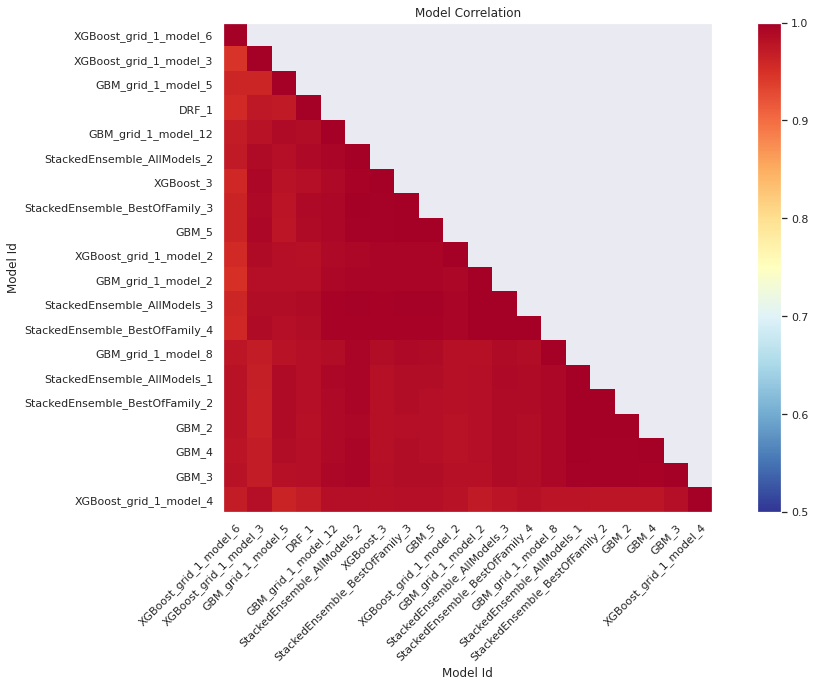

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

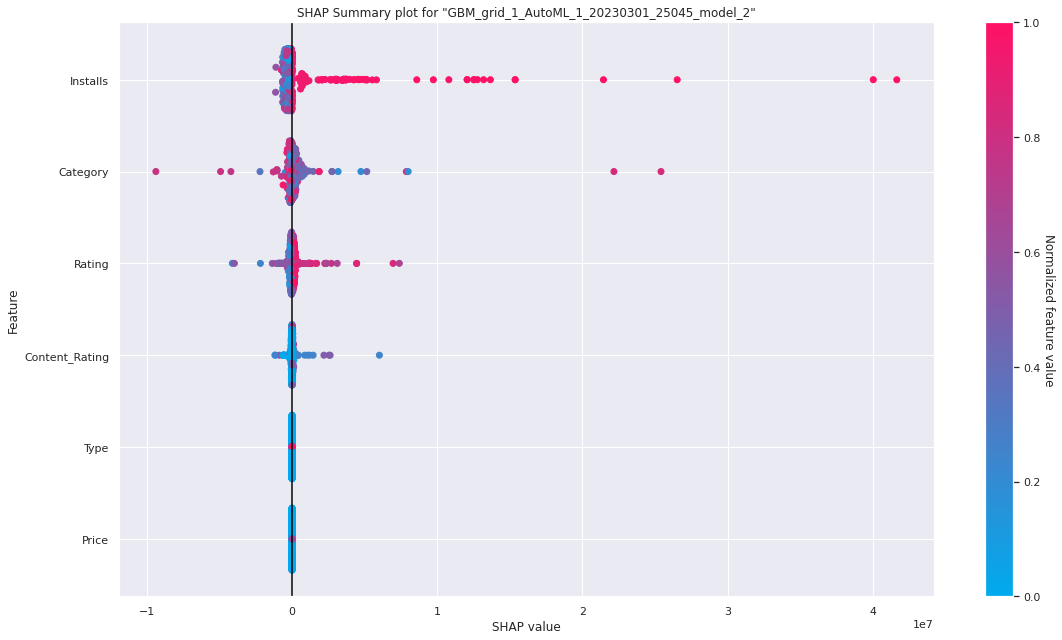

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

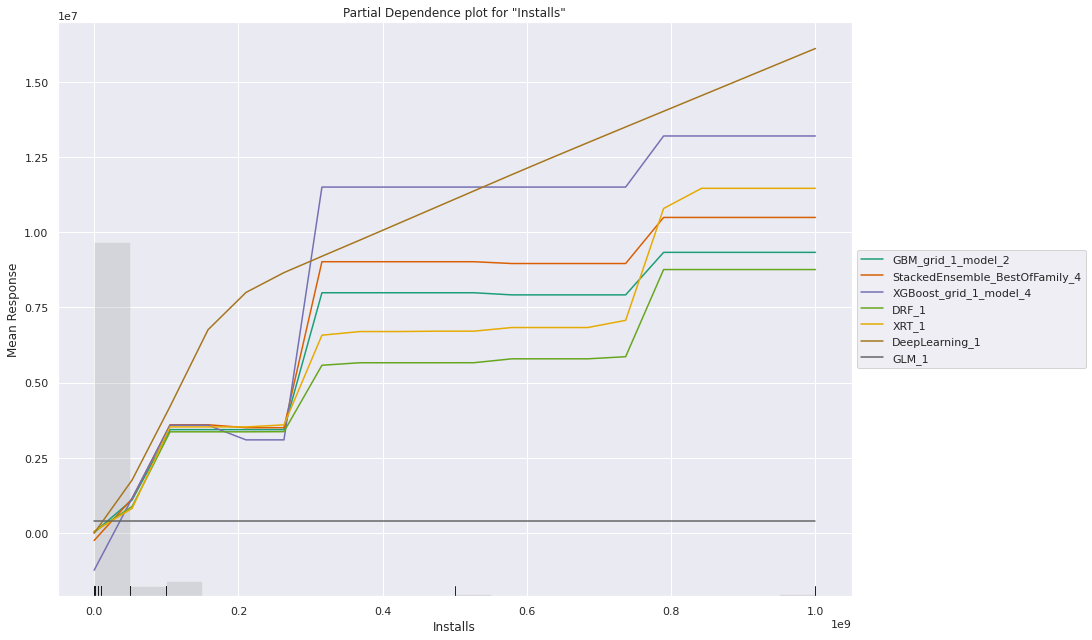

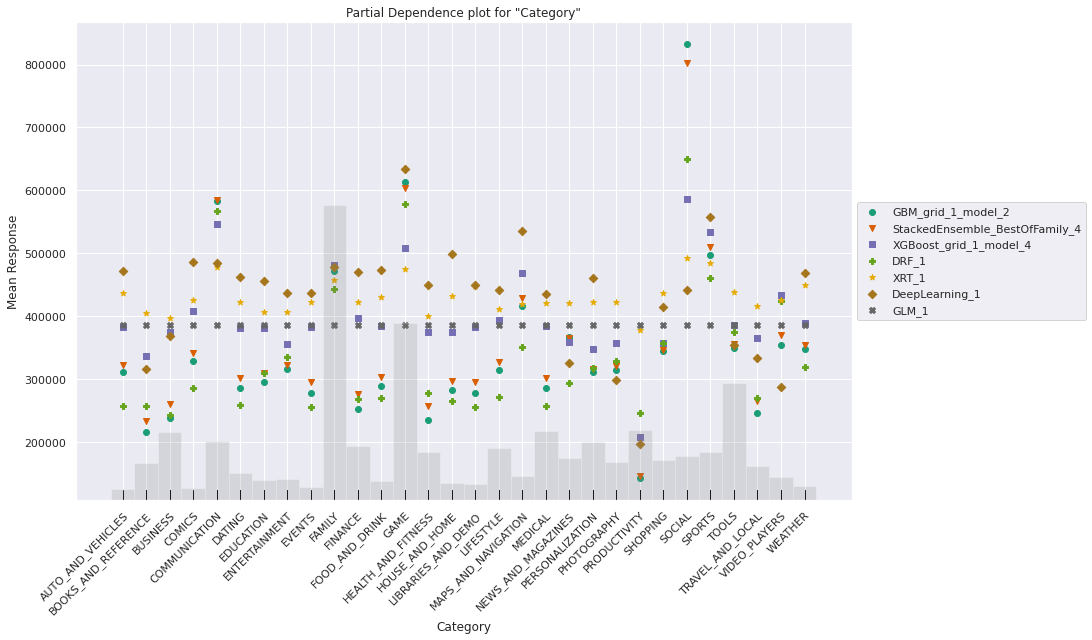

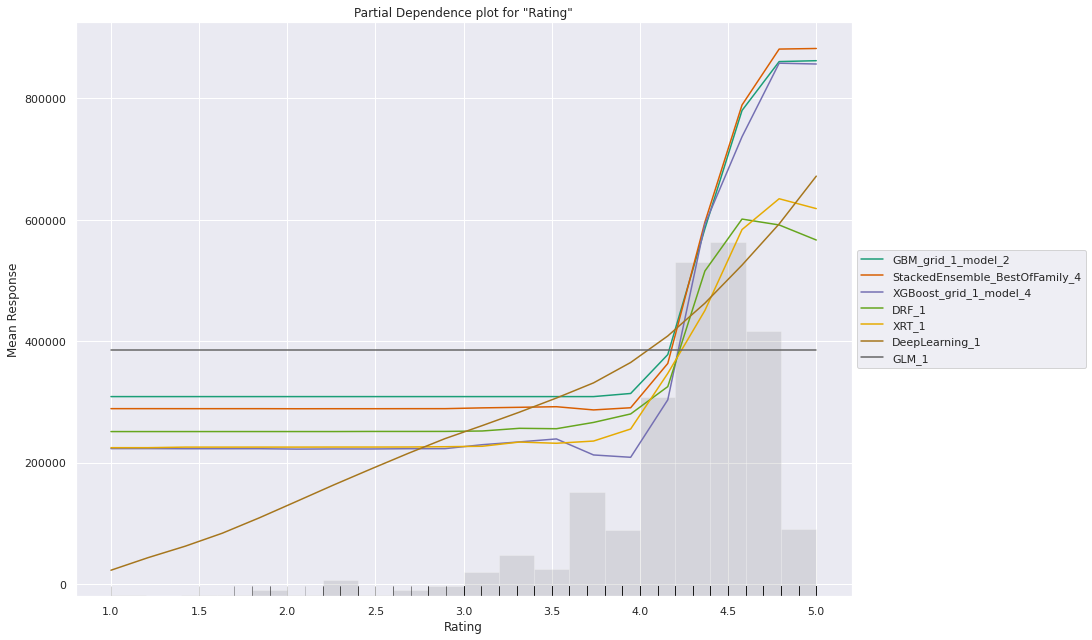

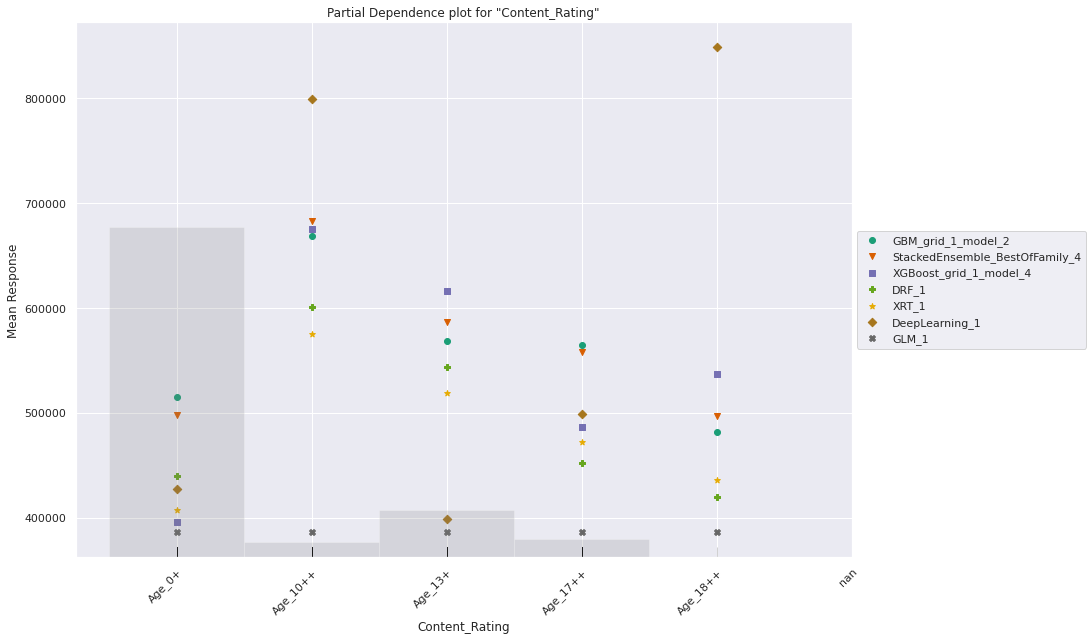

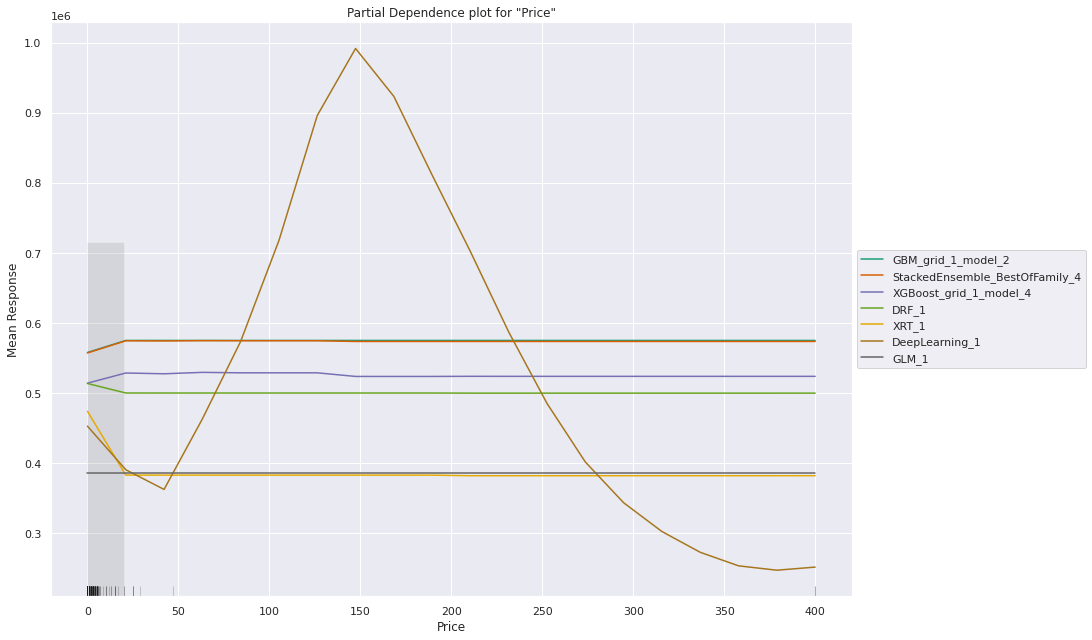

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

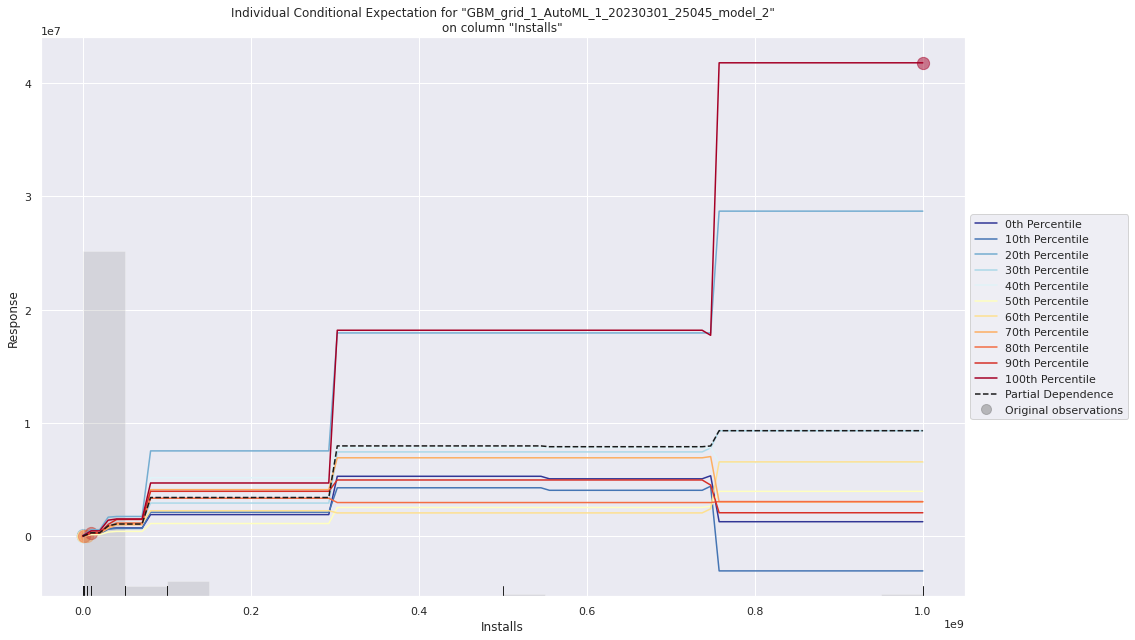

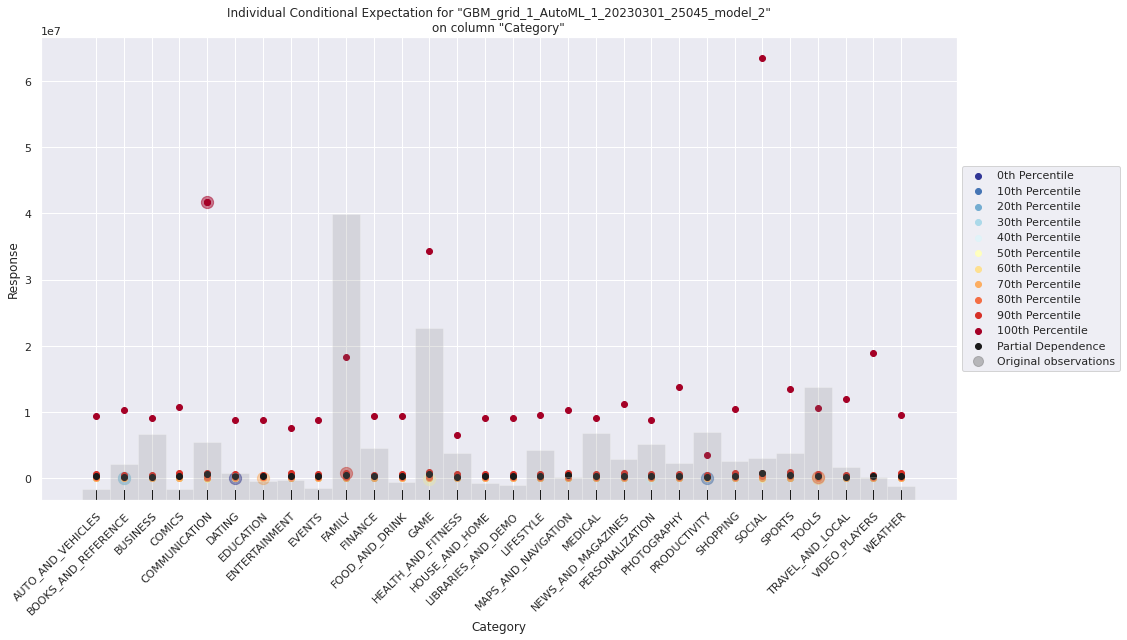

/usr/local/lib/python3.8/dist-packages/h2o/explanation/_explain.py:1714: UserWarning: Original observation of "rating" for 0th Percentile is [nan, 849.5482992319157]. Plotting of NAs is not yet supported.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/h2o/explanation/_explain.py:1714: UserWarning: Original observation of "rating" for 10th Percentile is [nan, 511.3901876596501]. Plotting of NAs is not yet supported.
  warnings.warn(msg)


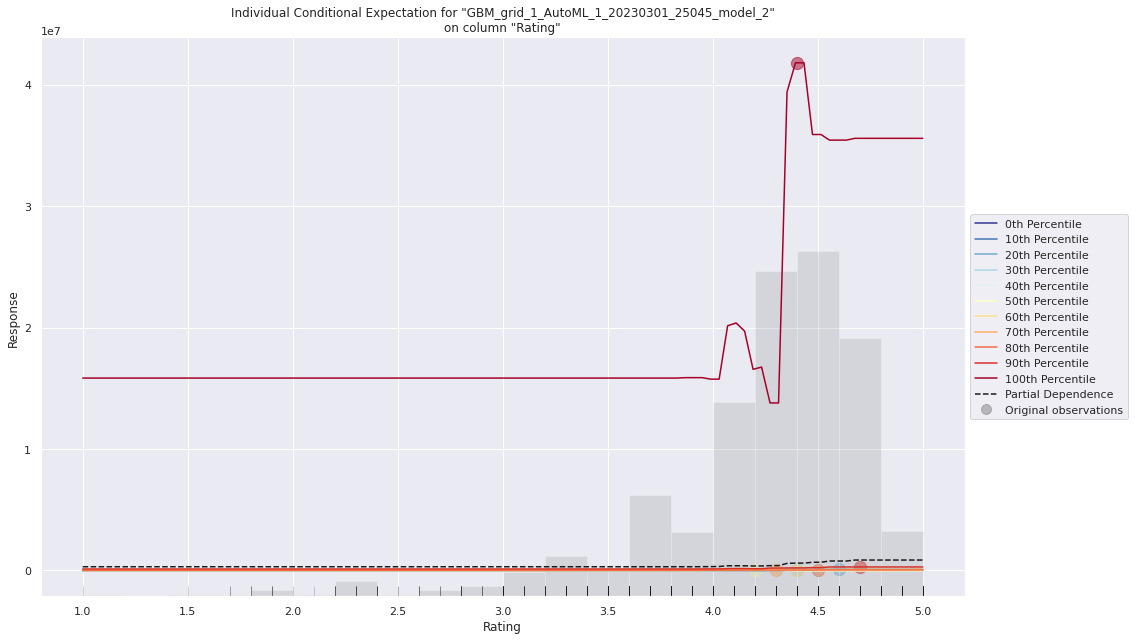

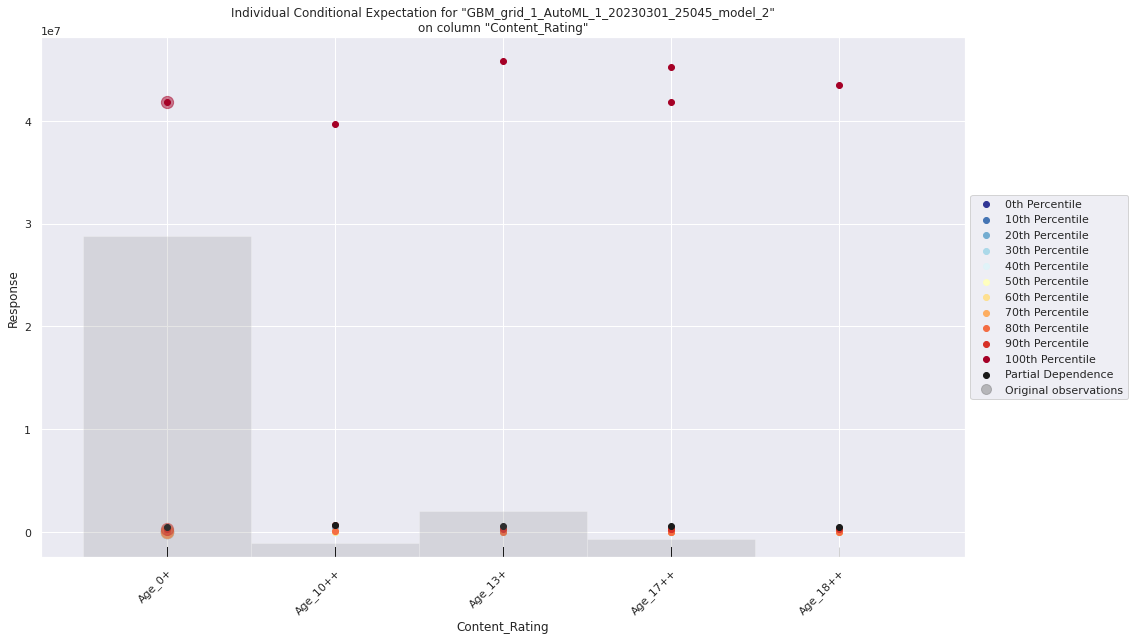

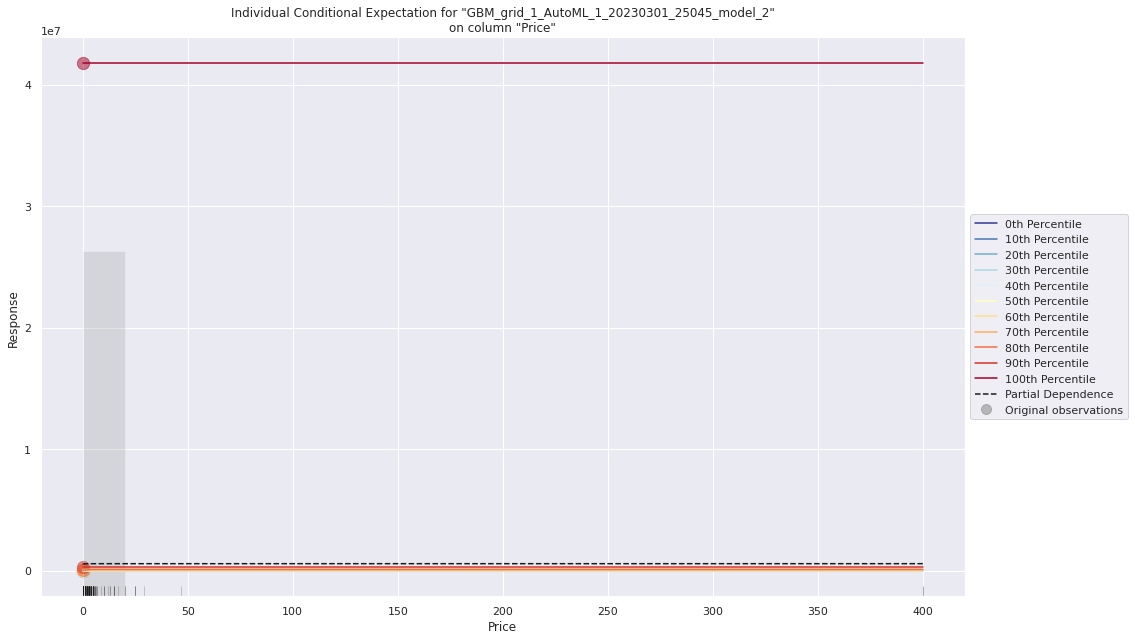

In [54]:
exa = aml.explain(df_test)

# Exicuting Hyperparameter Tuning - Random Grid Search on GBM Model

In [55]:
import statsmodels.formula.api as smf  # OLS model Library

In [56]:
import h2o

googleplaystore = h2o.as_list(df)

In [57]:
googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content_Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 809.3+ KB


In [58]:
googleplaystore.rename(columns={'Content Rating': 'Content_Rating', 'Last Updated': 'Last_Updated'}, inplace=True)

In [59]:
googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content_Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 809.3+ KB


In [60]:
googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content_Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 809.3+ KB


In [61]:
train, validate, test = np.split(
    googleplaystore.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [62]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [63]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [64]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [65]:
gbm_grid2.train(
    x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.9,0.09,9.0,0.6000000,gbm_grid2_model_3,1270729505050.3491211
,0.8,0.03,9.0,0.9,gbm_grid2_model_8,1323386121393.9909668
,0.7000000,0.03,6.0,1.0,gbm_grid2_model_6,1337003338133.0061035
,0.8,0.06,9.0,0.6000000,gbm_grid2_model_30,1355901005704.3603516
,0.5,0.1,9.0,1.0,gbm_grid2_model_7,1358638574837.7119141
,0.5,0.05,7.0,0.9,gbm_grid2_model_2,1379043593343.9514160
,0.7000000,0.06,5.0,0.6000000,gbm_grid2_model_14,1445473017923.0268555
,0.4,0.08,6.0,0.9,gbm_grid2_model_28,1451883894285.0241699
,0.9,0.09,8.0,0.9,gbm_grid2_model_36,1530624020414.3764648
,0.9,0.04,4.0,0.9,gbm_grid2_model_31,1572945044467.7292480


In [66]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)

## Which hyperparameters are important?

In [67]:
gbm_gridperf2

,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.9,0.09,9.0,0.6000000,gbm_grid2_model_3,1270729505050.3491211
,0.8,0.03,9.0,0.9,gbm_grid2_model_8,1323386121393.9909668
,0.7000000,0.03,6.0,1.0,gbm_grid2_model_6,1337003338133.0061035
,0.8,0.06,9.0,0.6000000,gbm_grid2_model_30,1355901005704.3603516
,0.5,0.1,9.0,1.0,gbm_grid2_model_7,1358638574837.7119141
,0.5,0.05,7.0,0.9,gbm_grid2_model_2,1379043593343.9514160
,0.7000000,0.06,5.0,0.6000000,gbm_grid2_model_14,1445473017923.0268555
,0.4,0.08,6.0,0.9,gbm_grid2_model_28,1451883894285.0241699
,0.9,0.09,8.0,0.9,gbm_grid2_model_36,1530624020414.3764648
,0.9,0.04,4.0,0.9,gbm_grid2_model_31,1572945044467.7292480


In [68]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [69]:
models = gbm_gridperf2.models

In [70]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [71]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [72]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [73]:
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.9        0.09          9          0.6       1.270730e+12
1               0.8        0.03          9          0.9       1.323386e+12
2               0.7        0.03          6          1.0       1.337003e+12
3               0.8        0.06          9          0.6       1.355901e+12
4               0.5        0.10          9          1.0       1.358639e+12
5               0.5        0.05          7          0.9       1.379044e+12
6               0.7        0.06          5          0.6       1.445473e+12
7               0.4        0.08          6          0.9       1.451884e+12
8               0.9        0.09          8          0.9       1.530624e+12
9               0.9        0.04          4          0.9       1.572945e+12
10              0.6        0.10          4          1.0       1.575231e+12
11              0.9        0.10          4          0.7       1.608618e+12
12              0.9      

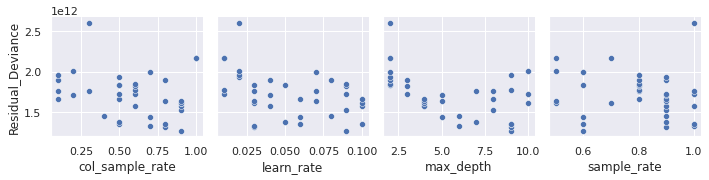

In [74]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

# Hyperparameter Tuning Analysis

- col_sample_rate: The fraction of columns to be randomly sampled for each tree. A low value can prevent overfitting, while a high value can increase model variance.
- learn_rate: The step size shrinkage used to prevent overfitting. A small value can slow down training but may result in better accuracy.
- max_depth: The maximum depth of the trees. A higher value can increase model complexity and may lead to overfitting, while a lower value can lead to underfitting.
- sample_rate: The fraction of rows to be randomly sampled for each tree. A low value can prevent overfitting, while a high value can increase model variance.
- Residual_Deviance: The measure of model performance, calculated as the difference between the predicted values and actual values.

## Conclusion

In conclusion, we successfully developed a predictive model to determine reviews value of the google play store using various attributes with the help of H2O AutoML. We also examined the effects of Ridge and LASSO regularization on the GLM Model, which helped us in improving the model's performance. Additionally, we utilized SHAP summary to identify the most important variables, and we optimized the model's hyperparameters using the Random Grid Search Method. By doing so, we were able to create a more robust and accurate model that can be further improved by exploring different techniques such as boosting or ensemble models. Overall, this project provides valuable insights into the various techniques and tools used in the creation of a high-performing predictive model.

# Answer the following questions for all of the models:





1. Is the relationship significant?
      
       According to the corelation HeatMap, reviews and installs are significantly correlated 

2. Are any model assumptions violated?

        there are no statistical assumptions that are violated. The code appears to be concerned with starting an H2O server with appropriate memory allocation. There is no data involved, nor any statistical analysis that might require assumptions about the distribution of the data.


3. Is there any multicollinearity in the model?

        Multicollinearity refers to a high degree of correlation between independent variables, which can cause problems in interpreting coefficients and can affect the stability of the model. In this case, we can see that Reviews and Installs are significantly correlated, with a correlation coefficient of 0.64, indicating that multicollinearity may be present.

4. In the multivariate models are predictor variables independent of all the other predictor variables?


        Predictor variables are considered independent when there is no relationship between them. One way to check for this is by calculating the correlation matrix of the variables or observing any patterns in graphs. In the case of a multivariate model, we can examine the correlation matrix and determine if any predictors are correlated with each other. For example, if we compute the correlation matrix for a model and find that Reviews and Installs are correlated, then we know they are not independent of each other. On the other hand, if no significant correlations are observed between other predictor variables, we can conclude that they are independent of each other.

    
5. In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

                Based on the multivariate model results, the variables are ranked in order of their significance as follows:

                - Installs
                - Rating
                - Category Communication
                - Category Social
                - Content
                In addition, the significant predictor variables that should be included in the model are:

                - Rating
                - Installs
                - Price
                - Content
                The insignificant predictor variables should be excluded from the model as they do not have a significant impact on the outcome variable (Review) in the presence of the other predictor variables.


6. Does the model make sense?


                To ensure that a model is valid, it needs to satisfy certain criteria such as meeting assumptions, having appropriate p values and VIFs, and achieving a low RMSE while targeting minimum and maximum values of the response variable. The R2 value, which indicates the accuracy of the model, should also be considered, and in this case, a value of 0.6248179 is considered good. To improve the model's accuracy, it may be necessary to drop some variables based on their significance, remove outliers, or employ a boosting or ensemble model. Overall, the model appears to be reasonable, but there are several methods that can be employed to improve its performance.


7. Does regularization help?

                Upon applying the ridge regularization, a marginal enhancement in the evaluation metrics of the cross-validation data is noticeable (r2 mean increased from 0.4003762 to 0.4227884). This implies that ridge regularization aids in preventing the overfitting of the model and results in a better performance of metrics on the validation dataset.

8. Which independent variables are significant?
       
       
        1.Rating

        2.Installs

        3.Price

        4.Content

9. Which hyperparameters are important?

                * col_sample_rate: The lowest residual_deviance was achieved with a value of 0.9, indicating that a higher fraction of columns sampled for each tree resulted in better model performance. However, a too high value may lead to increased model variance.

                * learn_rate: The lowest residual_deviance was achieved with a small value of 0.03. This indicates that a smaller step size shrinkage helped prevent overfitting and improved model accuracy, but it may also slow down training.

                * max_depth: The optimal value for max_depth was found to be 9.0, indicating that increasing the maximum depth of the trees helped improve model performance. However, a higher value may lead to overfitting, and a lower value may lead to underfitting.

                * sample_rate: The optimal value for sample_rate was found to be 1.0, indicating that using all rows for each tree helped improve model performance. However, a lower value can help prevent overfitting.

                * Overall, it is important to balance these hyper-parameters to achieve the best model performance. A combination of higher col_sample_rate, smaller learn_rate, and moderate max_depth may work well in this cases.

10. Coding professionalism?


                * Descriptive variable names: The variables used in the code have descriptive names that indicate what they represent. For example, list_residual_deviance and hyperparameters_dataframe are clear and informative names.

                * Consistent formatting: The code follows a consistent formatting style, with appropriate use of whitespace and indentation, which makes it easier to read and understand.

                * Modular code: The code is broken down into small, logical sections that each perform a specific task. This makes it easier to understand and maintain the code.

                * Use of comments: The code includes comments that explain what is happening in each section. This makes it easier for other developers to understand the code, and helps with future maintenance.

                * Readable code: The code is easy to read and understand. This is important because it makes the code more maintainable and easier to debug.


                    





References
- https://www.kaggle.com/datasets/lava18/google-play-store-apps?resource=download&select=googleplaystore.csv
- https://wttech.blog/blog/2021/painless-machine-learning-with-automl/
- https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/index.html

# Did I explain my licensing clearly? 

MIT License

Copyright (c) 2023 "Write your name"

This document hereby grants permission, at no cost, to any individual who obtains a copy of the Software and its associated documentation files (referred to collectively as the "Software"), to utilize the Software without limitations, including but not limited to the rights to use, copy, modify, merge, publish, distribute, sublicense, and sell copies of the Software, as well as allowing individuals to whom the Software is furnished to do the same. However, the aforementioned individuals must agree to the following terms and conditions: the copyright notice provided above, as well as this permission notice, must be included in all copies or substantial portions of the Software.





THE SOFTWARE IS MADE AVAILABLE ON AN "AS IS" BASIS, WITHOUT ANY WARRANTIES OR REPRESENTATIONS, EITHER EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE IMPLIED WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE, AND NON-INFRINGEMENT. THE AUTHORS OR COPYRIGHT HOLDERS OF THE SOFTWARE SHALL NOT BE HELD LIABLE FOR ANY CLAIM, DAMAGES, OR OTHER LIABILITY ARISING FROM, OUT OF, OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE, WHETHER IN AN ACTION OF CONTRACT, TORT, OR OTHERWISE.